<Figure size 1224x864 with 0 Axes>

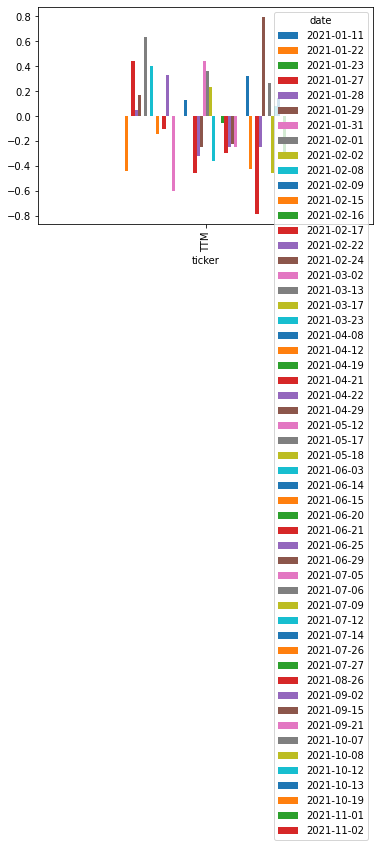

In [ ]:
import requests 
import urllib
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

!pip install fastapi

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import requests 
import json 
import pandas as pd 
!pip install fsspec
from io import StringIO 

from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

finviz_url = 'https://finviz.com/quote.ashx?t='
# tickers = ['AMZN', 'GOOG', 'FB','TTM']
tickers = ['TTM']


news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')
        # full = row.td.text

        # temp = ''
        if len(date_data) == 1:
            time = date_data[0]
            # full = temp + date_data[0]  
        else:
            date = date_data[0]
            time = date_data[1]
            # temp = date_data[0]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

fig = plt.figure(figsize=(17,12))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show() 

# Count vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier 
## IMPLEMENTING BAG OF WORDS MODEL
countvector= CountVectorizer(ngram_range=(2,2))
traindataset= countvector.fit_transform(df['title']) # CONVERTING ALL THE HEADLINES INTO VECTORS

# DATA CONVERTS INTO SPARSE MATRIX
traindataset[0] 

api_key = 'MXPE0FUWB351UOXC'
!pip install alpha_vantage
from alpha_vantage.timeseries import TimeSeries 
import time 

ts = TimeSeries(key = api_key ,output_format = 'pandas')
data , metadata = ts.get_daily_adjusted(symbol = 'TTM')   

In [ ]:
data1, metadata1 = ts.get_intraday(symbol = 'TTM')

In [ ]:
data1.reset_index(level=0, inplace=True)

data1.head() 

,date,1. open,2. high,3. low,4. close,5. volume
0,2021-11-05 19:30:00,32.780,32.780,32.78,32.78,125.0
1,2021-11-05 18:15:00,32.760,32.760,32.76,32.76,250.0
2,2021-11-05 16:15:00,32.760,32.950,32.76,32.76,5768.0
3,2021-11-05 16:00:00,32.770,32.800,32.69,32.78,137007.0
4,2021-11-05 15:45:00,32.765,32.805,32.75,32.77,26805.0


In [ ]:
df.head()

,ticker,date,time,title,compound
0,TTM,2021-11-02,12:30AM,Tata Motors (TTM) Q2 2022 Earnings Call Transc...,0.0000
1,TTM,2021-11-01,08:00PM,Chip Dip and Carbon Footprint Bills Trap Jaguar,-0.3182
2,TTM,2021-11-01,09:09AM,Skoda to make quarter of a million fewer cars ...,-0.2500
3,TTM,2021-11-01,08:39AM,Skoda to make quarter of a million fewer cars ...,-0.2500
4,TTM,2021-11-01,08:13AM,Chip crisis halves Jaguar Land Rover sales,-0.6249


In [ ]:
df.tail()

In [ ]:
data1['date'] = data1['date'].astype(str)
df['date'] = df['date'].astype(str)

In [ ]:
df['time'] = pd.to_datetime(df['time']).dt.time
df['time'] = df['time'].astype(str)

In [ ]:
df['date'] = df['date'] + ' ' + df['time']
df.head(2)  

,ticker,date,time,title,compound
0,TTM,2021-11-02 00:30:00,00:30:00,Tata Motors (TTM) Q2 2022 Earnings Call Transc...,0.0000
1,TTM,2021-11-01 20:00:00,20:00:00,Chip Dip and Carbon Footprint Bills Trap Jaguar,-0.3182


In [ ]:
data1.head(2)

,date,1. open,2. high,3. low,4. close,5. volume
0,2021-11-05 19:30:00,32.78,32.78,32.78,32.78,125.0
1,2021-11-05 18:15:00,32.76,32.76,32.76,32.76,250.0


In [ ]:
print(df.dtypes)
print('----------------') 
print(data1.dtypes)

ticker       object
date         object
time         object
title        object
compound    float64
dtype: object
----------------
date          object
1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object


In [ ]:
df['date'] = pd.to_datetime(df['date'])
data1['date'] = pd.to_datetime(data1['date'])

In [ ]:
df.sort_index(inplace = True)
data1.sort_index(inplace = True)

In [ ]:
data1.head(2)

,date,1. open,2. high,3. low,4. close,5. volume
0,2021-11-05 19:30:00,32.78,32.78,32.78,32.78,125.0
1,2021-11-05 18:15:00,32.76,32.76,32.76,32.76,250.0


In [ ]:
df.head(2)

,ticker,date,time,title,compound
0,TTM,2021-11-02 00:30:00,00:30:00,Tata Motors (TTM) Q2 2022 Earnings Call Transc...,0.0000
1,TTM,2021-11-01 20:00:00,20:00:00,Chip Dip and Carbon Footprint Bills Trap Jaguar,-0.3182


In [ ]:
df.tail()

,ticker,date,time,title,compound
95,TTM,2021-01-27 05:55:00,05:55:00,Jaguar Land Rover appoints creative chief to b...,0.4404
96,TTM,2021-01-23 20:10:00,20:10:00,15 Biggest Companies That Use AWS,0.0000
97,TTM,2021-01-22 04:50:00,04:50:00,Long road for Tesla in India with infrastructu...,-0.4404
98,TTM,2021-01-11 13:22:00,13:22:00,"Tata Motors stock soars, as electrified vehicl...",0.0000
99,TTM,2021-01-11 11:12:00,11:12:00,Tata Motors Stock Is Surging on India Tesla Ru...,0.0000


In [ ]:
data1.tail()

,date,1. open,2. high,3. low,4. close,5. volume
95,2021-11-03 09:15:00,32.07,32.07,32.07,32.07,501.0
96,2021-11-03 09:00:00,32.07,32.07,32.07,32.07,1499.0
97,2021-11-03 08:00:00,32.03,32.03,32.03,32.03,160.0
98,2021-11-03 04:30:00,32.33,32.33,32.33,32.33,342.0
99,2021-11-03 04:15:00,32.45,32.45,32.45,32.45,435.0


In [ ]:
print(df.shape)
print(data1.shape) 

(100, 5)
(100, 6)


In [ ]:
data1['compound'] = df['compound']*0

In [ ]:
data1.head(1)

,date,1. open,2. high,3. low,4. close,5. volume,compound
0,2021-11-05 19:30:00,32.78,32.78,32.78,32.78,125.0,0.0


In [ ]:
data1['compound'].unique()

array([0.])

In [ ]:
x = y = 0 
print(data1.shape[0])
for i in range(len(df['date'])):
  if i < data1.shape[0]:
    if df['date'][i] <= data1['date'][i] :
      data1['compound'][i] += df['compound'][i]

# WHY WAS THERE NO ERROR, UNMATCHED LENGTH OF THE TWO DATAFRAMES I MEAN ON EHAS 300 ROWS AND OTHER HAS A MERER 100 , Curious as to why this works.   
# print(x,y) 
data1.tail(3)  

100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,1. open,2. high,3. low,4. close,5. volume,compound
97,2021-11-03 08:00:00,32.03,32.03,32.03,32.03,160.0,-0.4404
98,2021-11-03 04:30:00,32.33,32.33,32.33,32.33,342.0,0.0000
99,2021-11-03 04:15:00,32.45,32.45,32.45,32.45,435.0,0.0000


In [ ]:
# data1['date'] = data1['date'].astype(str)
# data1['time'] = data1['date'].str.split(' ').str[1]
# data1['date'] = data1['date'].str.split(' ').str[0]
# data1.head(2)

In [ ]:
# data1['time'] = data1['time'].astype(str)
# data1['date'] = data1['date'].astype(str)
# df['date'] = df['date'].astype(str)
# data1.dtypes 

In [ ]:
data1.corr(method = 'pearson')

,1. open,2. high,3. low,4. close,5. volume,compound
1. open,1.000000,0.964077,0.962150,0.935911,0.036088,-0.233266
2. high,0.964077,1.000000,0.943379,0.960575,0.128131,-0.239184
3. low,0.962150,0.943379,1.000000,0.973371,0.006929,-0.207921
4. close,0.935911,0.960575,0.973371,1.000000,0.093573,-0.204494
5. volume,0.036088,0.128131,0.006929,0.093573,1.000000,0.014567
compound,-0.233266,-0.239184,-0.207921,-0.204494,0.014567,1.000000


In [ ]:
data1.head(7)

,date,1. open,2. high,3. low,4. close,5. volume,compound
0,2021-11-05 19:30:00,32.780,32.780,32.780,32.78,125.0,0.0000
1,2021-11-05 18:15:00,32.760,32.760,32.760,32.76,250.0,-0.3182
2,2021-11-05 16:15:00,32.760,32.950,32.760,32.76,5768.0,-0.2500
3,2021-11-05 16:00:00,32.770,32.800,32.690,32.78,137007.0,-0.2500
4,2021-11-05 15:45:00,32.765,32.805,32.750,32.77,26805.0,-0.6249
5,2021-11-05 15:30:00,32.690,32.780,32.670,32.76,34845.0,-0.2500
6,2021-11-05 15:15:00,32.660,32.710,32.625,32.70,33958.0,0.0000


In [ ]:
data1.drop('date', axis = 1 , inplace = True) 

In [ ]:
data['4. close'] = data['4. close'].shift(-8)
data1.head(2) 
data1 = data1.iloc[:-8, :] 
print(data1.shape) 

(92, 6)


In [ ]:
y = data1['4. close']
data1.drop('4. close', axis = 1 , inplace = True)
x = data1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler(feature_range=(0, 1))
x = s.fit_transform(x) 

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.3 , random_state = 1)
# x_train 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_test, y_test))

0.9348461921782233


In [ ]:
y_pred_reg = model.predict(x_test)

mean_squared_error = np.mean((y_pred_reg - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error) 

Mean squared Error on test set :  0.0019747471360708315


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'u' instances

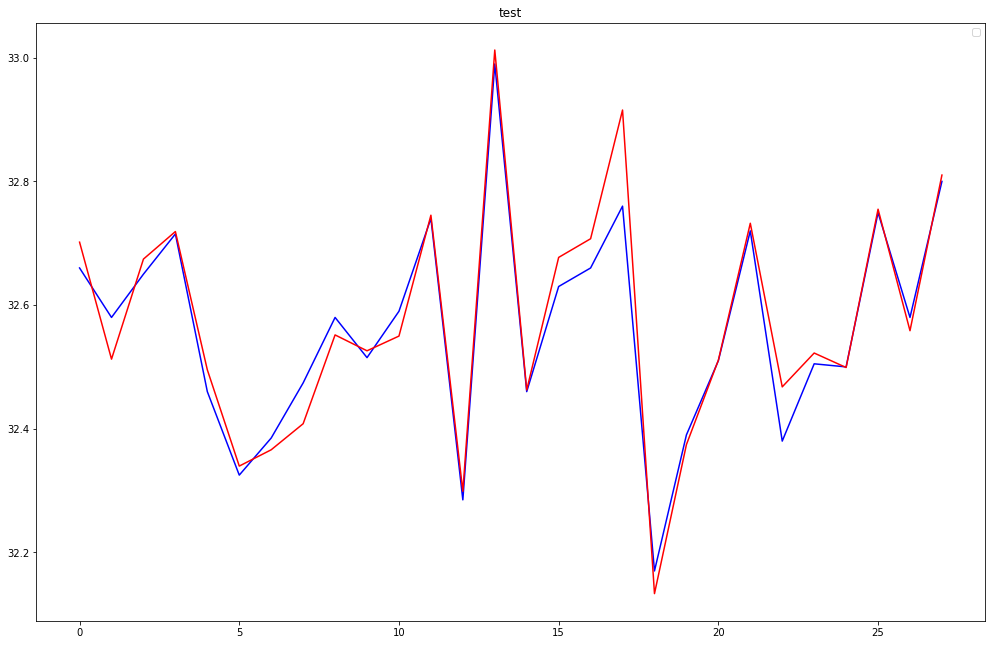

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.figure(figsize = (17,11))
    plt.plot(range(len(y_test)), y_test, color='blue', label = 'Actual')
    plt.plot(range(len(y_pred)), y_pred_reg, color='red' , label = 'Predicted' )
    plt.legend('Actual','Predicted')
    plt.title(regressorName)
    plt.show()
    return

plotGraph(y_test, y_pred_reg, "test")

In [ ]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import Ridge 

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model1 = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model1, x_train, y_train, cv=kfold, scoring=scoring)
print(results.mean()) 

-0.003950170378183978


In [ ]:
model1.fit(x_train , y_train)

y_pred_ridge = model1.predict(x_test)

mean_squared_error = np.mean((y_pred_ridge - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  0.00206945135643109


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'u' instances

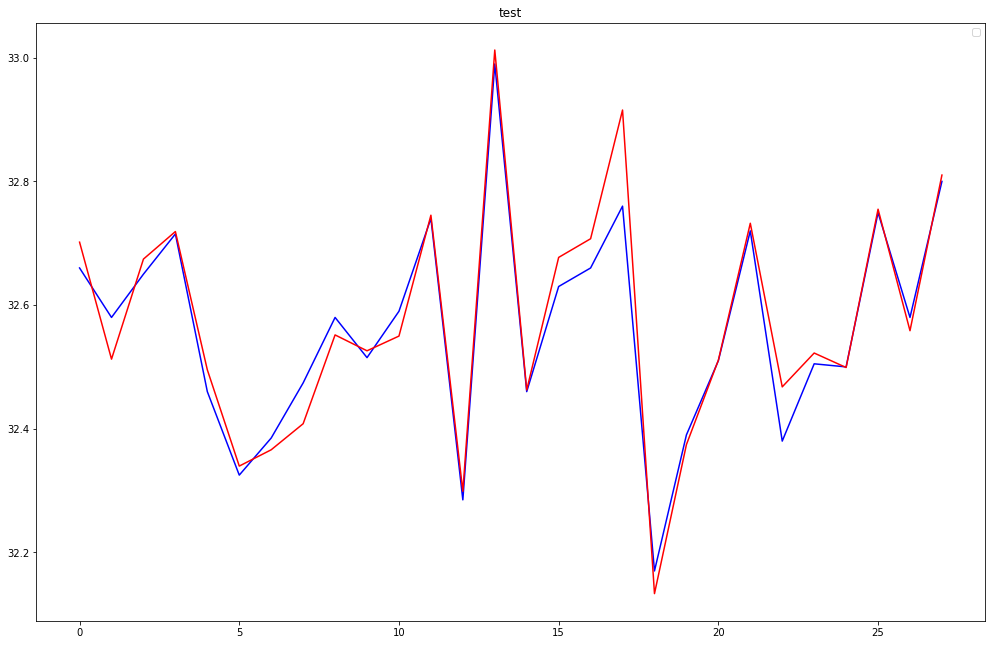

In [ ]:
plotGraph(y_test, y_pred_ridge , "test") 